In [ ]:
pip install pyarabic

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install imbalanced-learn

In [ ]:
#load libraries
import numpy as np# linear algebra
import pandas as pd # data processing
import pyarabic.araby as araby
import pyarabic.number as number
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re
import string 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
#Machine Learning Algorithms
from sklearn import svm
from sklearn.svm import SVC #support vector machine algorithm
from sklearn.naive_bayes import MultinomialNB #Naive Bayes algorithm
from sklearn.neighbors import KNeighborsClassifier# k-Nearest neighbors alogrithm
#measure of multi-class classfiction
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#upload the file
from google.colab import files
uploaded=files.upload()

Saving QU_Tweets_Dataset.xlsx to QU_Tweets_Dataset (2).xlsx


In [ ]:
#Read the file with pandas
import io
df=pd.read_excel(io.BytesIO(uploaded['QU_Tweets_Dataset.xlsx']))
df=pd.DataFrame(df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Sentiment,Text
0,Positive,أثبت اليوم الأول نجاحه صراحةً ، سعيد وفخور بإخ...
1,Negative,الله يلعن جامعه القصيم.
2,Negative,ياعمري حنا فيه تسريب والتماس وانهيار ونداوم وك...
3,Neutral,@SQUcom السلام عليكم ابغى رابط للتليجرام دراسا...
4,Positive,هنيئاً لجامعة القصيم بتطبيق هذه الرسالة 👏🏼👏🏼 #...


# **#Preprocess data**

## Normalization:

In [ ]:
#normalize_arabic
def normalize_arabic(Text):
    Text = re.sub("[إأآا]", "ا", Text)
    Text = re.sub("ى", "ي", Text)
    Text = re.sub("ة", "ه", Text)
    Text = re.sub("گ", "ك", Text)
    return Text

In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(Text):
    translator = str.maketrans('', '', punctuations_list)
    return Text.translate(translator)

In [ ]:
#remove_repeating_char
def remove_repeating_char(Text):
    return re.sub(r'(.)\1+', r'\1', Text)

In [ ]:
#processPost for applying all functions
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
     # remove repeated letters
    tweet=remove_repeating_char(tweet)
    
    return tweet

In [ ]:
df["Text"] = df["Text"].apply(lambda x: processPost(x)) 
# apply used to call the method processpost

## Tokenization:

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df["Text"] = df["Text"].apply(tokenizer.tokenize)

In [ ]:
df["Text"].head()

0    [اثبت, اليوم, الاول, نجاحه, صراحه, سعيد, وفخور...
1                           [اله, يلعن, جامعه, القصيم]
2    [ياعمري, حنا, فيه, تسريب, والتماس, وانهيار, ون...
3    [السلام, عليكم, ابغي, رابط, لتليجرام, دراسات, ...
4    [هنيئا, لجامعه, القصيم, بتطبيق, هذه, الرساله, ...
Name: Text, dtype: object

## Stop words:

In [ ]:
#stop words from NTLK
stopwords_list = stopwords.words('arabic')

In [ ]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
print(len(stopwords_list))
print(type(stopwords_list))
listToStr = ' '.join([str(elem) for elem in stopwords_list])
listToStr

754
<class 'list'>


'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [ ]:
#Removing Stop Words
df["Text"]=df["Text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
#Tweet text information
all_words = [word for tokens in df["Text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["Text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

126785 words total, with a vocabulary size of 26584
Max sentence length is 51


## Text Cleaning:

In [ ]:
import re
import sys

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
for letter in '#.][!XR=@ _-,.*&:;?" AaBbCcDdEeFfGgHhIiJjKkLlMmNnOoPpQqRrSsTtUuVvWwXxYyZz1234567890 ًٌٍَُِ❤️😍💕☹️😂👍💔🙏':
   df['Text'] = df['Text'].astype(str).str.replace(letter,'')

In [ ]:
df.head(10)

,Sentiment,Text
0,Positive,'اثبت''اليوم''الاول''نجاحه''صراحه''سعيد''وفخور...
1,Negative,'اله''يلعن''جامعه''القصيم'
2,Negative,'ياعمري''حنا''تسريب''والتماس''وانهيار''ونداوم'...
3,Neutral,'السلام''عليكم''ابغي''رابط''لتليجرام''دراسات''...
4,Positive,'هنيئا''لجامعه''القصيم''بتطبيق''الرساله''توعيه...
5,Positive,'اشهد''اله''جل''وعلا''بان''جامعهالقصيم''قامت''...
6,Positive,'امدحي''جامعه''القصيم''ولك''دعوه''الملتزم'
7,Negative,'خريجات''اسره''وطفوله''جامعه''القصيم''نعاني''ظ...
8,Negative,'انا''مدري''وش''الي''حادني''اسوي''فولو''لحساب'...
9,Positive,'الحمد''حصلت''جامعتنا''جامعهالقصيم''علي''المرك...


# **#Dataset analysis**

## Checking Null Values and Count:

In [ ]:
df[df.isnull().any(axis=1)].head()

,Sentiment,Text


In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
df.isnull().any(axis=0)

Sentiment    False
Text         False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  8234 non-null   object
 1   Text       8234 non-null   object
dtypes: object(2)
memory usage: 128.8+ KB


## Top 10 Words:

In [ ]:
counter = Counter(all_words)

In [ ]:
counter.most_common(10)

[('جامعه', 4103),
 ('القصيم', 3806),
 ('جامعهالقصيم', 3319),
 ('علي', 1432),
 ('الي', 1298),
 ('اله', 1258),
 ('ان', 581),
 ('كليه', 537),
 ('انا', 526),
 ('الجامعه', 487)]

## Count All Tweets:

In [ ]:
#total count all tweets
print(len(df))

8234


In [ ]:
#Count of each target Sentiment(positive,negative,neutral)
y=df['Sentiment']
y.value_counts()

Neutral     4399
Negative    3168
Positive     667
Name: Sentiment, dtype: int64

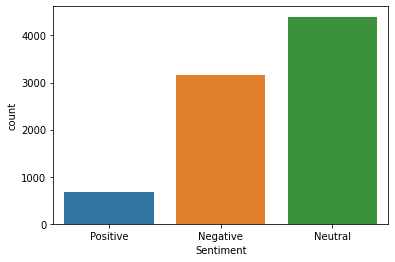

In [ ]:
sns.countplot(data= df, x = "Sentiment")
plt.show()

# **#Features Extraction( from tweets text with TFIDF unigram)**

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 3),
    max_features =10000)

unigramdataGet = word_vectorizer.fit_transform(df['Text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,اب,ابا,ابارك,ابارك لاخي,ابارك لجميع,ابارك لزملاء,ابارك لزملاء والزميلات,ابارك لزميل,ابالخيل,ابتداء,ابحاث,ابحث,ابد,ابد ابد,ابدا,ابداع,ابداع وتميز,ابدعت,ابراهيم,ابراهيم العطيه,ابراهيم بن,ابراهيم بن علي,ابرز,ابسط,ابسط حقوقنا,ابشركم,ابغا,ابغي,ابغي نقل,ابغي نقل حي,ابفهم,ابليس,ابن,ابناء,ابناينا,ابو,ابو زياد,ابو زياد الاعلامي,ابو ساعتين,ابو طبل,...,١٦,١٨,١٩,٢٠,٢٠ الف,٢٠١٥,٢٠١٨,٢٠١٨ لطلاب,٢٠١٨ لطلاب والطالبات,٢٠١٨م,٢٠١٩,٢٠٢,٢٠٣٠,٢٣,٢٥,٢٨,٢٩,٣٠,٣٤,٣٥,٣٩٢,٤٠,٤٠ اعمال,٤٠ الف,٤٠ درجه,٤٥,٤٥٠,٥٠,٥٠ او,٥٠ ٥٠,٥٠٥٠,٥٠٥٠ تضرطلابجامعهالقصيمبالمذنب,٦٠,٦٠ درجه,٦٠ فاينل,٧٠,٧٠ درجه,٧٥,٨٠,٩٠
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#encoding class as (2 for Postive) class,(1 for neutral) and (0 for negative) class
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(df['Sentiment'])
df['Sentiment'] = encpro

In [ ]:
#By getting features and Class
y=df['Sentiment']
X=unigramdata_features

In [ ]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2]
 [3168 4399  667]]


#Splitting Dataset 

In [ ]:
#Spliting Dataset into 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5000)

In [ ]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1   2]
 [652 855 140]]


#Data balancing(Using SMOTE)

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


Streaming output truncated to the last 5000 lines.
Class=8085, n=1 (0.012%)
Class=7204, n=1 (0.012%)
Class=1099, n=1 (0.012%)
Class=3181, n=1 (0.012%)
Class=5269, n=1 (0.012%)
Class=615, n=1 (0.012%)
Class=4744, n=1 (0.012%)
Class=6077, n=1 (0.012%)
Class=4592, n=1 (0.012%)
Class=6554, n=1 (0.012%)
Class=4598, n=1 (0.012%)
Class=4135, n=1 (0.012%)
Class=2857, n=1 (0.012%)
Class=2104, n=1 (0.012%)
Class=3011, n=1 (0.012%)
Class=5724, n=1 (0.012%)
Class=2960, n=1 (0.012%)
Class=54, n=1 (0.012%)
Class=5506, n=1 (0.012%)
Class=3450, n=1 (0.012%)
Class=6175, n=1 (0.012%)
Class=4776, n=1 (0.012%)
Class=6320, n=1 (0.012%)
Class=5226, n=1 (0.012%)
Class=2952, n=1 (0.012%)
Class=606, n=1 (0.012%)
Class=3559, n=1 (0.012%)
Class=135, n=1 (0.012%)
Class=6471, n=1 (0.012%)
Class=7770, n=1 (0.012%)
Class=1152, n=1 (0.012%)
Class=2209, n=1 (0.012%)
Class=1159, n=1 (0.012%)
Class=5723, n=1 (0.012%)
Class=1258, n=1 (0.012%)
Class=7133, n=1 (0.012%)
Class=4002, n=1 (0.012%)
Class=168, n=1 (0.012%)
Class

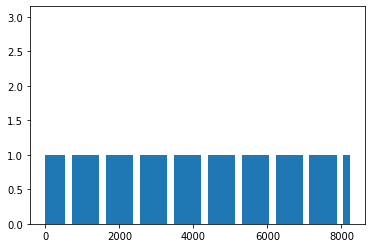

In [ ]:
# load and summarize the dataset
import io
from pandas import read_excel
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
df=pd.read_excel(io.BytesIO(uploaded['QU_Tweets_Dataset.xlsx']))
df=pd.DataFrame(df)
# load the file as a data frame
df=pd.DataFrame(df)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=2, n=4399 (33.333%)
Class=0, n=4399 (33.333%)
Class=1, n=4399 (33.333%)


<BarContainer object of 3 artists>

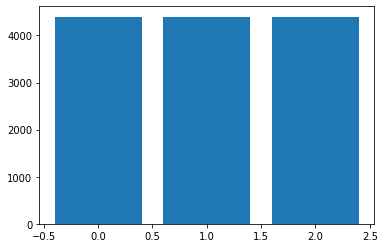

In [ ]:
# example of oversampling a multi-class classification dataset
from pandas import read_excel
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
df=pd.read_excel(io.BytesIO(uploaded['QU_Tweets_Dataset.xlsx']))
df=pd.DataFrame(df)
# load the file as a data frame
df=pd.DataFrame(df)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
#encoding class as 2 for Postive class,1 for neutral and 0 for negative class
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(df['Sentiment'])
df['Sentiment'] = encpro
y=df['Sentiment']
X=unigramdata_features
unique_elements, counts_elements = np.unique(y, return_counts=True)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())

# **------------------------------- Machine Learning Algorithms ----------------------------------**

# **Support Vector Machines (SVM) Algorithm:**

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
SVC()

SVC()

In [ ]:
#Accuracy
y_pred = clf.predict(x_test)
clf_1=clf.score(x_test, y_test)
print('Accuracy= {:.3f}'.format(clf.score(x_test, y_test)))

Accuracy= 0.762


In [ ]:
#Precision
print('Precision',round(f1_score(y_test, y_pred, average='weighted'),2)*100,'%')

Precision 74.0 %


In [ ]:
#Recall
print('Recall',round(recall_score(y_test, y_pred, average='weighted'),2)*100,'%')

Recall 76.0 %


In [ ]:
#F1-Score
clf_1_f1=round(f1_score(y_test, y_pred, average='weighted'),2)
print('F1',round(f1_score(y_test, y_pred, average='weighted'),2)*100,'%')

F1 74.0 %


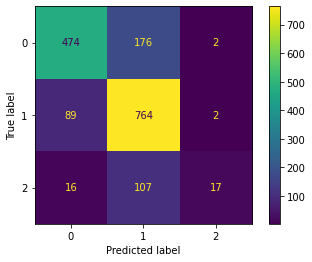

In [ ]:
cm = confusion_matrix(y_test,y_pred,labels=pd.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted'))) 
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.79
Macro Recall: 0.58
Macro F1-score: 0.59

Weighted Precision: 0.77
Weighted Recall: 0.76
Weighted F1-score: 0.74

Classification Report

              precision    recall  f1-score   support

    Negative       0.82      0.73      0.77       652
     Neutral       0.73      0.89      0.80       855
    Positive       0.81      0.12      0.21       140

    accuracy                           0.76      1647
   macro avg       0.79      0.58      0.59      1647
weighted avg       0.77      0.76      0.74      1647



# **Naive Bayes Algorithm**

In [ ]:
nb= MultinomialNB()
nb= nb.fit(x_train , y_train)
nb

MultinomialNB()

In [ ]:
#Accuracy
y_pred = nb.predict(x_test)
nb_1 = nb.score(x_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(x_test, y_test)))

Accuracy= 0.772


In [ ]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1   2]
 [807 699 141]]


In [ ]:
#Precision
print('Precision',round(f1_score(y_test, y_pred, average='weighted'),2)*100,'%')

Precision 77.0 %


In [ ]:
#Recall
print('Recall',round(recall_score(y_test, y_pred, average='weighted'),2)*100,'%')

Recall 77.0 %


In [ ]:
#F1-score
nb_1_f1=round(f1_score(y_test, y_pred, average='weighted'),2)
print('F1',round(f1_score(y_test, y_pred, average='weighted'),2)*100,'%')

F1 77.0 %


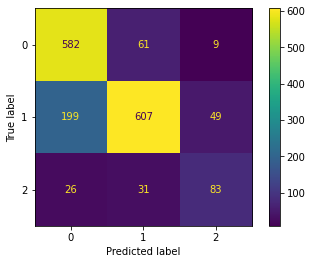

In [ ]:
cm = confusion_matrix(y_test,y_pred,labels=pd.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted'))) 
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Accuracy: 0.77

Micro Precision: 0.77
Micro Recall: 0.77
Micro F1-score: 0.77

Macro Precision: 0.73
Macro Recall: 0.73
Macro F1-score: 0.72

Weighted Precision: 0.79
Weighted Recall: 0.77
Weighted F1-score: 0.77

Classification Report

              precision    recall  f1-score   support

    Negative       0.72      0.89      0.80       652
     Neutral       0.87      0.71      0.78       855
    Positive       0.59      0.59      0.59       140

    accuracy                           0.77      1647
   macro avg       0.73      0.73      0.72      1647
weighted avg       0.79      0.77      0.77      1647



# **k-Nearest Neighbors Alogrithms**

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(x_train, y_train)
kn

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Accuracy
y_pred = kn.predict(x_test)
kn_1 = kn.score(x_test, y_test)
print('Accuracy= {:.3f}'.format(kn.score(x_test, y_test)))

Accuracy= 0.498


In [ ]:
#Precision
print('Precision',round(f1_score(y_test, y_pred, average='weighted'),2)*100,'%')

Precision 47.0 %


In [ ]:
#Recall
print('Recall',round(recall_score(y_test, y_pred, average='weighted'),2)*100,'%')

Recall 50.0 %


In [ ]:
#F1_Score
kn_1_f1=round(f1_score(y_test, y_pred, average='weighted'),2)
print('F1',round(f1_score(y_test, y_pred, average='weighted'),2)*100,'%')

F1 47.0 %


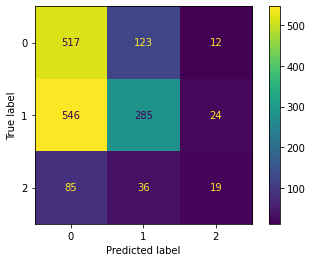

In [ ]:
cm = confusion_matrix(y_test,y_pred,labels=pd.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted'))) 
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Accuracy: 0.50

Micro Precision: 0.50
Micro Recall: 0.50
Micro F1-score: 0.50

Macro Precision: 0.48
Macro Recall: 0.42
Macro F1-score: 0.40

Weighted Precision: 0.54
Weighted Recall: 0.50
Weighted F1-score: 0.47

Classification Report

              precision    recall  f1-score   support

    Negative       0.45      0.79      0.57       652
     Neutral       0.64      0.33      0.44       855
    Positive       0.35      0.14      0.19       140

    accuracy                           0.50      1647
   macro avg       0.48      0.42      0.40      1647
weighted avg       0.54      0.50      0.47      1647



# **Comparison of all algorithms Results**

By Hanan ,Taif

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", " F1_Score "]

x.add_row(["Support vector machines Algorithm",  round(clf_1_f1,2)])
x.add_row(["Naive Bayes Algorithm", round(nb_1_f1,2)])
x.add_row(["k nearest nighbors Algorithm", round(kn_1_f1,2)])


print(x)
print('\n')



Comparison of all algorithms on F1 score
+-----------------------------------+------------+
|               Model               |  F1_Score  |
+-----------------------------------+------------+
| Support vector machines Algorithm |    0.74    |
|       Naive Bayes Algorithm       |    0.77    |
|    k nearest nighbors Algorithm   |    0.47    |
+-----------------------------------+------------+




# **Test Model**

In [ ]:
tweettest='اكثر شي شايل همه تعليق الموقع بعد شوي 💔. #جامعة_القصيم'

In [ ]:
tweettest = processPost(tweettest)

In [ ]:
tweettest = tokenizer.tokenize(tweettest)

In [ ]:
newtweettest= list()
for word in tweettest:
  for letter in '#.][!XR=@ _-,.*&:;?" AaBbCcDdEeFfGgHhIiJjKkLlMmNnOoPpQqRrSsTtUuVvWwXxYyZz1234567890 ❤️😍💕☹️😂👍💔🙏':
    word = word.replace(letter,'')
  newtweettest.append(word)

In [ ]:
newtweettest

['اكثر', 'شي', 'شايل', 'همه', 'تعليق', 'الموقع', 'بعد', 'شوي', 'جامعهالقصيم']

In [ ]:
tweettest = [item for item in newtweettest if item not in stopwords_list]

In [ ]:
tweettest = ' '.join(tweettest)
tweettest

'اكثر شي شايل همه تعليق الموقع شوي جامعهالقصيم'

In [ ]:
tweettest_transformed = word_vectorizer.transform([tweettest])

In [ ]:
tweettest_transformed = tweettest_transformed.toarray()

## **Testing "Naive Bayes Algorithm " on all data because now we know that is giving better results**

In [ ]:
pred=nb.predict(tweettest_transformed)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
result=pd.DataFrame(columns=['Text' ,'Prediction'])
result.loc[0,'Text']=tweettest
result.loc[0,'Prediction']= pred[0]
result

,Text,Prediction
0,اكثر شي شايل همه تعليق الموقع شوي جامعهالقصيم,Negative


In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html Project_SentimentAnalysis.ipynb

[NbConvertApp] Converting notebook Project_ML_SA.ipynb to html
[NbConvertApp] Writing 614635 bytes to Project_ML_SA.html
